<a href="https://colab.research.google.com/github/AaravWattal/RRAM-Models/blob/main/MLP_Pulse_Width_vs_Conductance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from datascience import *
import pandas as pd
import matplotlib.pyplot as plt
import math
import random
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [3]:
# get file set_sweep for conductange range data
names = ["addr", "pw", "vwl", "vbsl", "preread", "postread"]
data = pd.read_csv("/content/set_sweep.csv", names=names)
data.head(20)

,addr,pw,vwl,vbsl,preread,postread
0,0,2.000000e-08,0.5,0.5,151240.470700,115068.986900
1,2,2.000000e-08,0.5,1.0,123855.302200,124977.565700
2,4,2.000000e-08,0.5,1.5,127236.989700,106676.196700
3,6,2.000000e-08,0.5,2.0,93031.982770,133852.645200
4,8,2.000000e-08,0.5,2.5,75606.517090,57549.247700
5,10,2.000000e-08,0.5,3.0,97572.302250,92171.401490
6,12,2.000000e-08,0.6,0.5,46314.963040,50373.876070
7,14,2.000000e-08,0.6,1.0,100303.315400,149505.440600
8,16,2.000000e-08,0.6,1.5,212694.720700,75614.854910
9,18,2.000000e-08,0.6,2.0,5747.716015,5608.268993


In [4]:
x1 = data[['pw']]
x2 = data[['vwl']]
x3 = data[['vbsl']]
x4 = data[['preread']]
y = data[['postread']]

In [5]:
y1 = [1/i for i in y["postread"]]
y2 = [i/(150e-6) for i in y1]

In [6]:
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor

In [7]:
#I will take the max conductance value and map it to 1 by multiplying by 0.511*10^4
value = 0.511*10**4
print(0.00019584*value)

y3 = [i*value for i in y1]
print(y3)
print(max(y3))
print(min(y3))

1.0007424
[0.04440814278169334, 0.04088733823049652, 0.0479019702433767, 0.03817630942119028, 0.08879351519307523, 0.055440189878792304, 0.10144146924288887, 0.03417935815240158, 0.0675793136954655, 0.9111545837722981, 0.07495584021412594, 0.1243437954209893, 0.03885021323551558, 0.07420944518300189, 0.14283555272626744, 0.10529447485095887, 0.09162448123142143, 0.9280431824224492, 0.03401659333416961, 0.03312149014048232, 0.0752245720810912, 0.38030933970218356, 0.28789993428517796, 0.8801065939637305, 0.07138916577659593, 0.03257415786404181, 0.0269493046451815, 0.35702739067189687, 0.468824987914591, 0.5525578349850624, 0.06464393065856265, 0.06276001550417036, 0.3604382166927755, 0.4708953677044949, 0.5558711069878407, 0.4989046182981523, 0.10397222341235829, 0.04388170323040603, 0.48811814314486185, 0.5192787196430975, 0.5116887319074322, 0.5486938406903997, 0.06573144276053425, 0.33055420906285843, 0.4765589671627595, 0.46629303266009114, 0.5958163938054075, 0.6640364883086296, 0

In [8]:
x = data[["pw","vwl","vbsl","preread"]].to_numpy()
y = np.array(y3)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

y

array([ 0.04440814,  0.04088734,  0.04790197, ...,  0.07150105,
        0.06638705,  0.04168021])

In [9]:
print("Training MLPRegressor...")
tic = time()
est = make_pipeline(
    QuantileTransformer(),
    MLPRegressor(
        #hidden_layer_sizes=(45,23),
        hidden_layer_sizes=(100, 67, 46),
        learning_rate_init=0.03,
        early_stopping=True,
        random_state=0,
    ),
)
est.fit(X_train, y_train)
print(f"done in {time() - tic:.3f}s")
print(f"Test R2 score: {est.score(X_test, y_test):.5f}")

Training MLPRegressor...
done in 24.419s
Test R2 score: 0.96584


In [10]:
#Calculating mean squared error
predictions = est.predict(X_test)
mean_squared_error(y_test, predictions, squared=False)

0.059182914841580864

In [11]:
mean_squared_error(y_test, predictions, squared=True)

0.0035026174091458123

In [12]:
predictions

array([ 0.82079344,  0.88743805,  0.74980644, ...,  0.82656699,
        0.75793309,  0.86966716])

In [13]:
# print(len(X_test))
# print(len(predictions))
# print(X_test[:,3])
# X_test_list = list(X_test[:,3])
# print(max(X_test_list))

# value = 0.000001087159842
# X_test_list = [i*value for i in X_test_list]

In [14]:
df = pd.DataFrame(X_test, columns = ['pw','vwl','vbsl','preread'])
df['predictions'] = predictions
df['postread'] = y_test
df.head()

,pw,vwl,vbsl,preread,predictions,postread
0,4.000000e-08,2.9,2.5,91655.274800,0.820793,0.896669
1,4.000000e-07,3.3,3.0,96939.816210,0.887438,0.831908
2,1.000000e-06,1.8,2.0,130436.694700,0.749806,0.783825
3,4.000000e-08,2.8,2.5,91205.328640,0.818510,0.786874
4,2.000000e-07,2.8,0.5,5803.611526,0.880464,0.879683


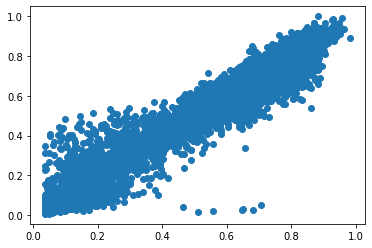

In [20]:
%matplotlib inline
plt.scatter(predictions, y_test)

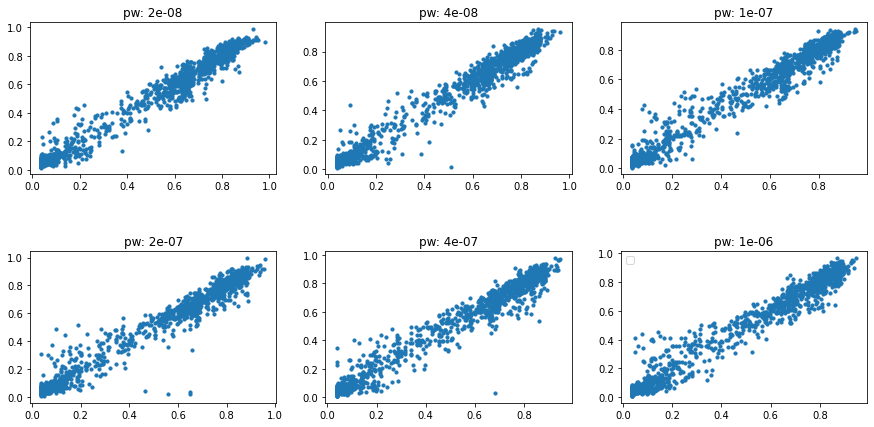

In [21]:
grouped = df.groupby('pw')
rowlength = int(grouped.ngroups/2)
fig, axs = plt.subplots(figsize=(15,7), nrows=2, ncols=rowlength, gridspec_kw=dict(hspace=0.5))

targets = zip(grouped.groups.keys(), axs.flatten())
for i, (key, ax) in enumerate(targets):
    subset = grouped.get_group(key)
    ax.scatter(subset["predictions"],subset["postread"], alpha=1, s=10)
    ax.set_title("pw: "+str(key))
ax.legend()
plt.show()